In [17]:
from deep_rl.common.metrics import load_metrics
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

%matplotlib inline

In [9]:
filename = '/media/data/repos/bachelor-thesis/resources/data/seekavoid-a2c-unreal.metric'
import csv
from collections import defaultdict

with open(filename) as file:
    metrics = defaultdict(lambda: ([], []))
    for line in csv.reader(file):
        name = line[0]
        count = int(line[1])
        times = list(map(int, line[2:(2 + count)]))
        values = list(map(float, line[(2 + count):]))
        metrics[name][0].extend(times)
        metrics[name][1].extend(values)

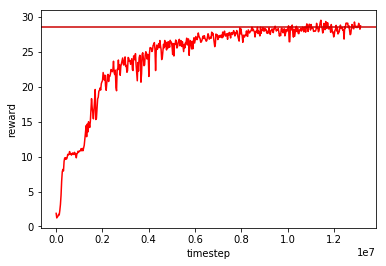

In [60]:
def interpolate_data(data, factor = None):
    x, y = data
    tck = interpolate.splrep(x, y, s=0)    
    spl = interpolate.UnivariateSpline(*data)
    if factor is not None:
        spl.set_smoothing_factor(0.5)
    xmin, xmax = min(x), max(x)
    xnew = np.arange(xmin, xmax, (xmax-xmin) / 500)
    return xnew, spl(xnew)

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

def plot_single_metric(data, color, smoothing_factor = 200000000.0):
    #plt.plot(*data, c = color)
    interpolated_reward = interpolate_data(data, smoothing_factor)
    plt.plot(*interpolated_reward, c = color)
    plt.axhline(y=max(interpolate_data(data)[1]), color = lighten_color(color, 1.2))
    
fig = plt.figure()
plot_single_metric(metrics['reward'], 'r')
plt.xlabel('timestep')
plt.ylabel('reward')
plt.show()